In [33]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

In [34]:
df= pd.read_csv('report3_0810.csv', header=0)
df.rename(columns={"Country name": "Country", "year":"Year","Life Ladder":"Happiness_Score", "Log GDP per capita":"Economy", 
                  "Social support":"Society" , "Healthy life expectancy at birth":"Health", "Freedom to make life choices":"Freedom",
                  "alcohol disorders":"Alcohol", "suicide rates":"Suicide", "Perceptions of corruption":"Corruption", "DALYs Mental disorders":"Mental"}, inplace=True)
df['Year']= df['Year'].astype("category")
model = ols("Happiness_Score~  Economy + Generosity+ Society + Health + Freedom + Corruption + schooling+ Alcohol+ Suicide + Obesity+ Fertility + Mental", data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     521.7
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:38:16   Log-Likelihood:                -1470.8
No. Observations:                1849   AIC:                             2968.
Df Residuals:                    1836   BIC:                             3039.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4720      0.389    -11.505      0.000      -5.234      -3.710
Economy        0.5089      0.029     17.719      0.000       0.453       0.565
Generosity     0.5603      0.089      6.270      0.000       0.385       0.736
Society        2.1001      0.160     13.085      0.000       1.785       2.415
Health         0.0414      0.005      8.432      0.000       0.032       0.051
Freedom        1.1118      0.116      9.553      0.000       0.884       1.340
Corruption    -0.3134      0.088     -3.561      0.000      -0.486      -0.141
schooling     -0.0167      0.008     -2.076      0.038      -0.033      -0.001
Alcohol        0.0397      0.004      9.337      0.000       0.031       0.048
Suicide       -0.1459      0.025     -5.898      0.000      -0.194      -0.097
Obesity       -0.0179      0.004     -4.584      0.000      -0.025      -0.010
Fertility      0.1363      0.021      6.366      0.000       0.094       0.178
Mental         0.0517      0.013      3.970      0.000       0.026       0.077
==============================================================================
Omnibus:                       16.674   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.810
Skew:                          -0.100   Prob(JB):                     1.11e-05
Kurtosis:                       3.506   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# 표준편차 출력 (스케일 조정 전)
df.describe().loc["std"]

Happiness_Score    1.126021
Economy            1.141610
Society            0.118337
Health             7.328347
Freedom            0.140793
Generosity         0.160714
Corruption         0.188655
schooling          3.168912
Alcohol            3.666853
Suicide            0.653881
Obesity            5.057063
Fertility          1.372061
Mental             2.227339
Name: std, dtype: float64

<AxesSubplot:xlabel='Economy', ylabel='Happiness_Score'>

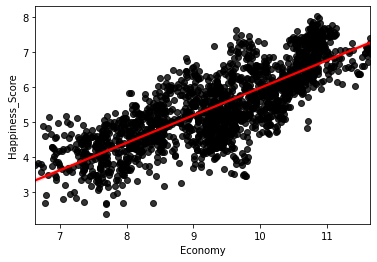

In [36]:
sns.regplot(y='Happiness_Score', x='Economy',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Society', ylabel='Happiness_Score'>

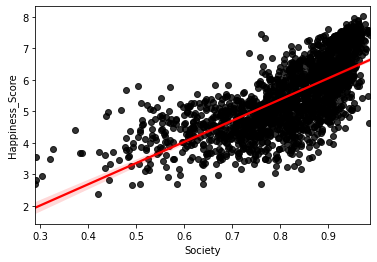

In [37]:
sns.regplot(y='Happiness_Score', x='Society',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Health', ylabel='Happiness_Score'>

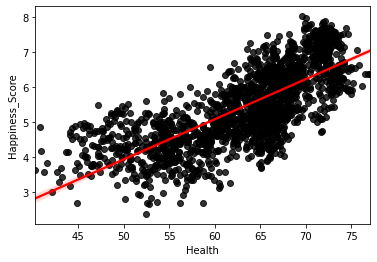

In [38]:
sns.regplot(y='Happiness_Score', x='Health',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Freedom', ylabel='Happiness_Score'>

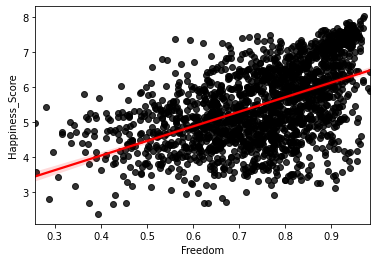

In [39]:
sns.regplot(y='Happiness_Score', x='Freedom',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Generosity', ylabel='Happiness_Score'>

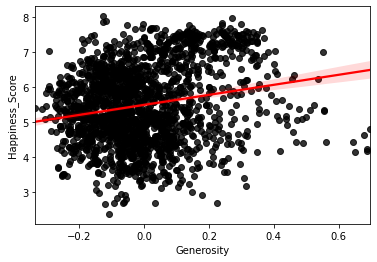

In [40]:
sns.regplot(y='Happiness_Score', x='Generosity',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Corruption', ylabel='Happiness_Score'>

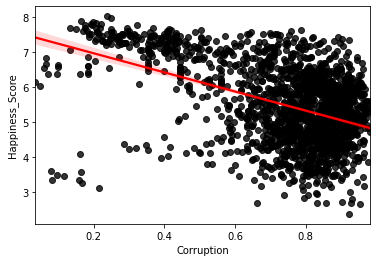

In [41]:
sns.regplot(y='Happiness_Score', x='Corruption',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='Alcohol', ylabel='Happiness_Score'>

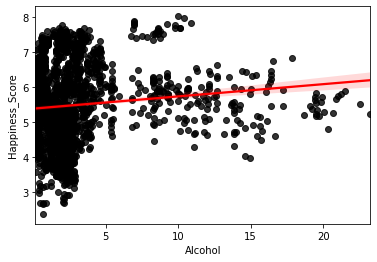

In [42]:
sns.regplot(y='Happiness_Score', x='Alcohol',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='Suicide', ylabel='Happiness_Score'>

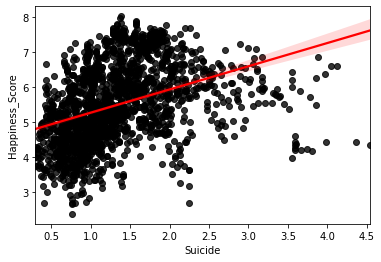

In [43]:
sns.regplot(y='Happiness_Score', x='Suicide',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='schooling', ylabel='Happiness_Score'>

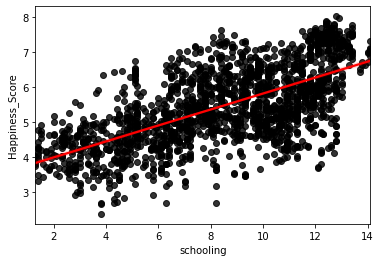

In [44]:
sns.regplot(y='Happiness_Score', x='schooling',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='Obesity', ylabel='Happiness_Score'>

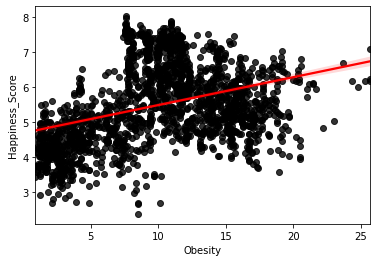

In [45]:
sns.regplot(y='Happiness_Score', x='Obesity',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='Fertility', ylabel='Happiness_Score'>

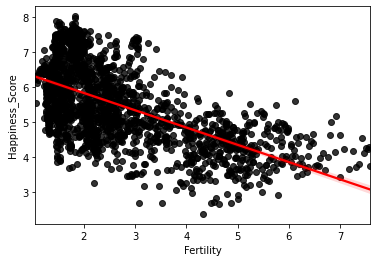

In [46]:
sns.regplot(y='Happiness_Score', x='Fertility',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


<AxesSubplot:xlabel='Mental', ylabel='Happiness_Score'>

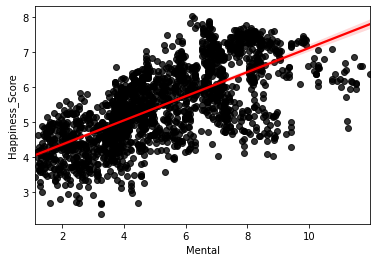

In [47]:
sns.regplot(y='Happiness_Score', x='Mental',data=df,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


In [48]:
# 스케일 조정
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['Happiness_Score', 'Economy', 'Generosity', 'Society', 'Health', 'Freedom', 'Corruption', 'schooling', 'Alcohol',
       'Suicide', 'Fertility', 'Mental','Obesity']
scale_df= standard_scaling(df, scale_columns)
scale_df.head()

,Country,Year,Happiness_Score,Economy,Society,Health,Freedom,Generosity,Corruption,schooling,Alcohol,Suicide,Obesity,Fertility,Mental
0,Afghanistan,2008,-1.564312,-1.757670,-3.080110,-1.742021,-0.206045,1.056243,0.747130,-1.755887,-0.603775,-1.135914,-0.842393,2.681727,-1.334799
1,Afghanistan,2009,-0.962192,-1.608757,-2.226615,-1.687439,-0.483047,1.193133,0.577508,-1.724330,-0.609045,-1.112864,-0.751431,2.541062,-1.286534
2,Afghanistan,2010,-0.646034,-1.515030,-2.336470,-1.632856,-1.044153,0.763798,-0.180490,-1.692773,-0.612846,-1.079549,-0.678266,2.393110,-1.226677
3,Afghanistan,2011,-1.468399,-1.538681,-2.488579,-1.589190,-1.782825,1.018910,-0.053273,-1.661217,-0.617369,-1.049588,-0.624875,2.242242,-1.174206
4,Afghanistan,2012,-1.511915,-1.464224,-2.488579,-1.545524,-1.534233,1.479356,0.185257,-1.629660,-0.621785,-1.030766,-0.583349,2.090645,-1.134110


In [49]:
# 표준편차 출력 (스케일 조정 후)
scale_df.describe().loc["std"]

Happiness_Score    1.0
Economy            1.0
Society            1.0
Health             1.0
Freedom            1.0
Generosity         1.0
Corruption         1.0
schooling          1.0
Alcohol            1.0
Suicide            1.0
Obesity            1.0
Fertility          1.0
Mental             1.0
Name: std, dtype: float64

In [50]:
model = ols("Happiness_Score~  Economy + Generosity+ Society + Health + Freedom + Corruption + schooling+ Alcohol+ Suicide + Obesity+ Fertility + Mental", data=scale_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     521.7
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:39:12   Log-Likelihood:                -1251.3
No. Observations:                1849   AIC:                             2529.
Df Residuals:                    1836   BIC:                             2600.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.653e-15      0.011   1.49e-13      1.000      -0.022       0.022
Economy        0.5160      0.029     17.719      0.000       0.459       0.573
Generosity     0.0800      0.013      6.270      0.000       0.055       0.105
Society        0.2207      0.017     13.085      0.000       0.188       0.254
Health         0.2695      0.032      8.432      0.000       0.207       0.332
Freedom        0.1390      0.015      9.553      0.000       0.110       0.168
Corruption    -0.0525      0.015     -3.561      0.000      -0.081      -0.024
schooling     -0.0470      0.023     -2.076      0.038      -0.091      -0.003
Alcohol        0.1294      0.014      9.337      0.000       0.102       0.157
Suicide       -0.0847      0.014     -5.898      0.000      -0.113      -0.057
Obesity       -0.0802      0.017     -4.584      0.000      -0.115      -0.046
Fertility      0.1660      0.026      6.366      0.000       0.115       0.217
Mental         0.1024      0.026      3.970      0.000       0.052       0.153
==============================================================================
Omnibus:                       16.674   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.810
Skew:                          -0.100   Prob(JB):                     1.11e-05
Kurtosis:                       3.506   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 극단값
# 아웃라이어 제거로 0.01 모든 row 0.01 아래
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head(20)


1253    0.009813
1256    0.009771
109     0.009005
1386    0.008430
208     0.008088
1389    0.008076
209     0.008060
1390    0.007943
498     0.007934
1387    0.007851
1388    0.007612
1392    0.007582
1456    0.006654
1135    0.006511
1385    0.006472
657     0.006233
1391    0.006046
1519    0.006005
258     0.005948
930     0.005710
dtype: float64

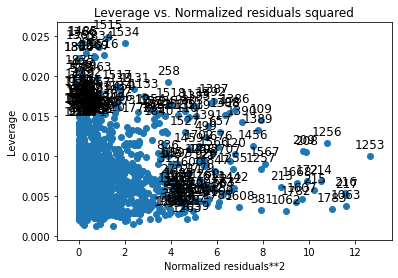

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.plot_leverage_resid2(model)
plt.show()

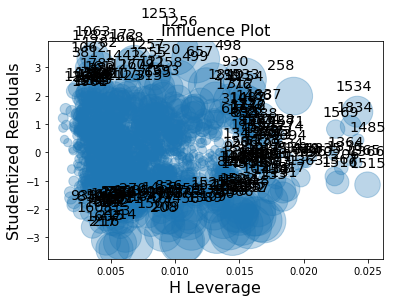

In [53]:
sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()